# 项目：个人医疗费用数据集

## 简介

该数据集提供了医疗费用以及个人情况的相关数据，可以用于探索医疗费用与个人情况（包括身体情况、社会情况等）之间的关联。

变量含义：
- `age`：医保受益人的年龄
- `sex`：医保受益人性别，女性/男性
- `bmi`：身体质量指数，表示身高与体重的比值（kg/m^2），理想情况下为18.5-24.9
- `children`：医保受益人的抚养儿童人数
- `smoker`：是否为吸烟者
- `region`：地区，即受益人在美国的居住区（东北部、东南部、西南部、西北部）
- `charges`：医保支付的医疗费用

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./insurance.csv")

In [3]:
original_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **评估和清理数据**

In [4]:
cleaned_data = original_data.copy()

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


`sex`, `smoker`, `region`列是分类型数据catagory

In [6]:
cleaned_data['sex'] = cleaned_data['sex'].astype('category')
cleaned_data['smoker'] = cleaned_data['smoker'].astype('category')
cleaned_data['region'] = cleaned_data['region'].astype('category')

In [7]:
# 检查缺失值
cleaned_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# 检查重复值
cleaned_data.duplicated().sum()

1

In [9]:
# 删除重复值
cleaned_data = cleaned_data.drop_duplicates()

In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [11]:
cleaned_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 数据分析

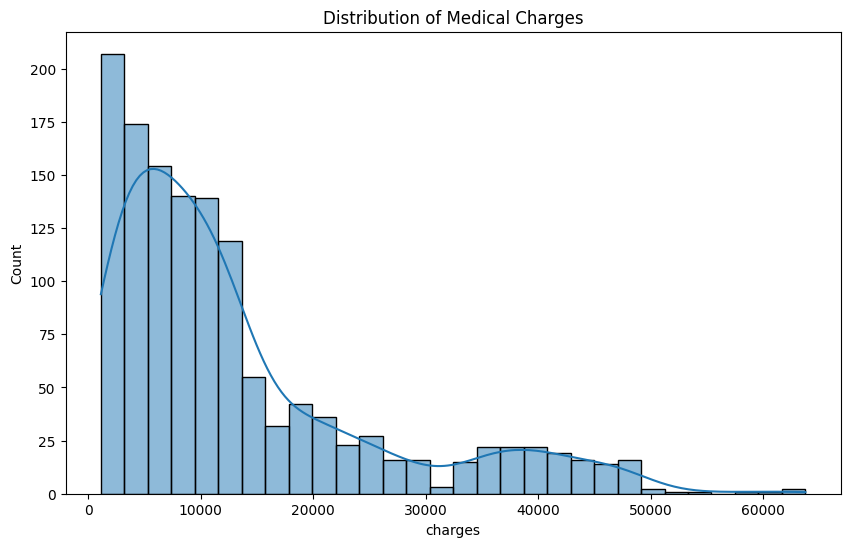

In [13]:
# 绘制 charges（医疗费用）的分布图
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.show()

检查 charges 与其他数值变量（如 `age`、`bmi` 和 `children`）之间的相关性。

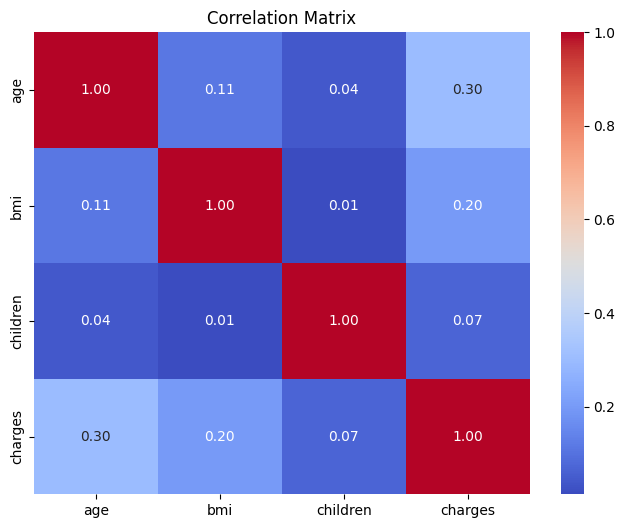

In [15]:
# 相关矩阵
correlation_matrix = cleaned_data[["age", "bmi", "children", "charges"]].corr()

# 绘制相关性热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

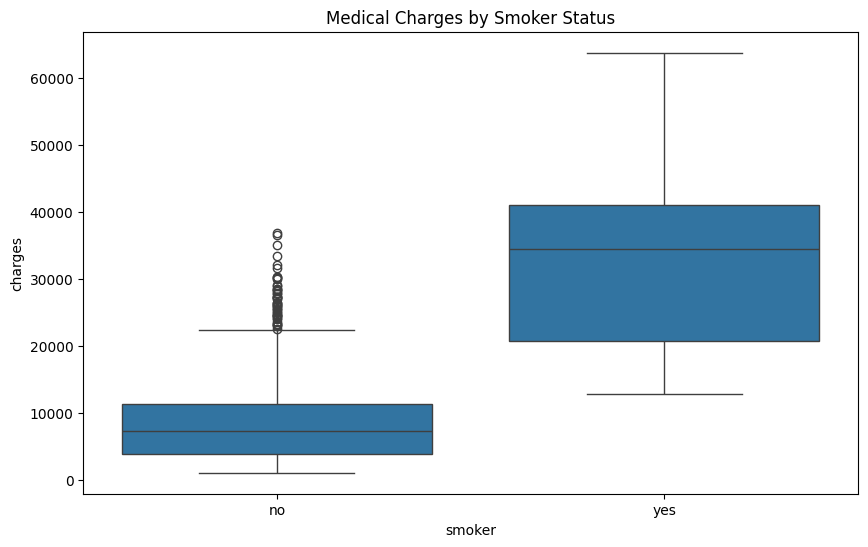

In [16]:
# 吸烟者与非吸烟者的医疗费用箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=cleaned_data)
plt.title('Medical Charges by Smoker Status')
plt.show()

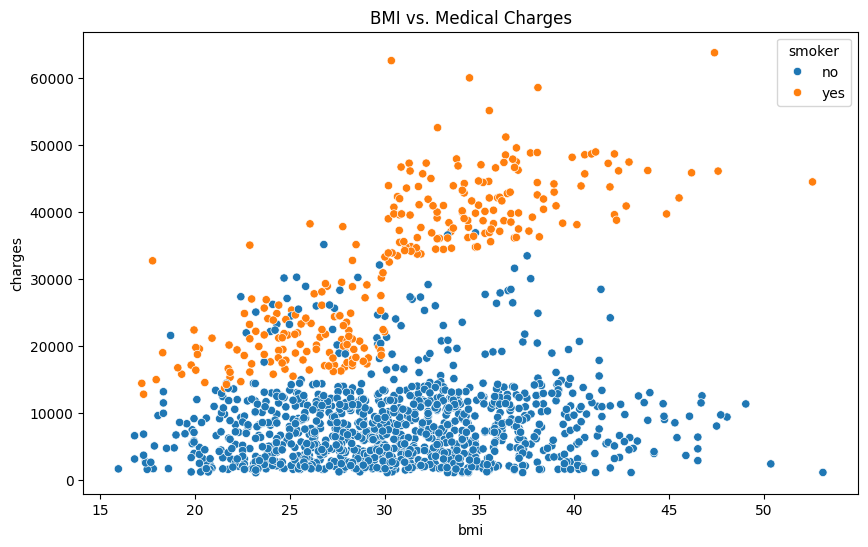

In [20]:
# BMI与医疗费用的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=cleaned_data, hue='smoker')
plt.title('BMI vs. Medical Charges')
plt.show()

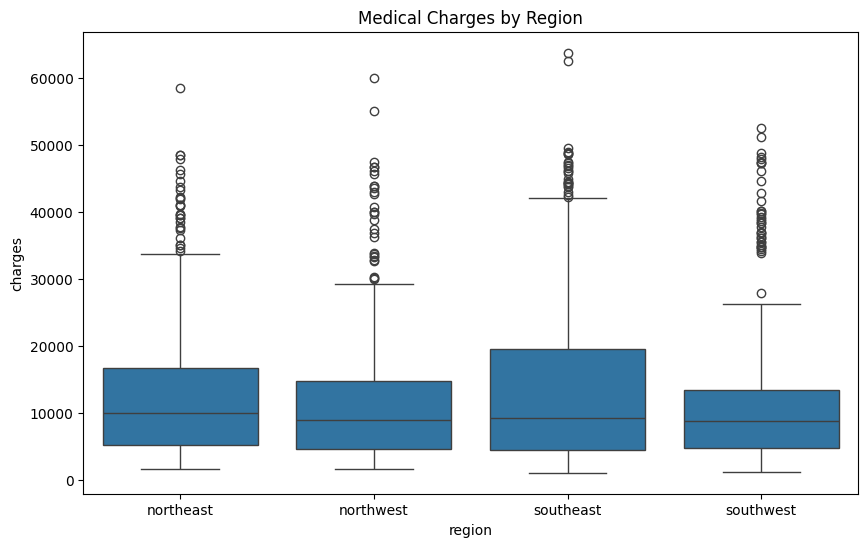

In [18]:
# 各地区的医疗费用箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=cleaned_data)
plt.title('Medical Charges by Region')
plt.show()